In [1]:
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import scipy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pickle
from joblib import dump, load

In [3]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

/home/mike/miniconda3/envs/openmmlab/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv("/home/mike/python_files/ML_services/data/NHANES_age_prediction.csv")
data["age_group"]

0       Adult
1       Adult
2       Adult
3       Adult
4       Adult
        ...  
2273    Adult
2274    Adult
2275    Adult
2276    Adult
2277    Adult
Name: age_group, Length: 2278, dtype: object

In [3]:
le = LabelEncoder()

In [6]:
le.fit(data["age_group"])
data["age_group"] = le.transform(data["age_group"])
data

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,0,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...,...,...
2273,83711.0,0,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,0,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,0,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,0,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99


<Axes: >

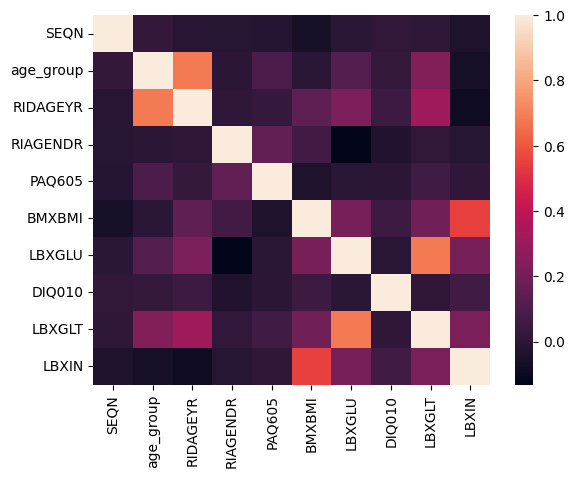

In [7]:
sns.heatmap(data.corr())

In [8]:
# train_X, test_X, train_y, test_y = train_test_split(data.drop(["age_group", "RIDAGEYR"], axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
train_X, test_X, train_y, test_y = train_test_split(data.drop("age_group", axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
# mms = MinMaxScaler()
# mms.fit(pd.concat((train_X,test_X)).sort_index())
# train_X = pd.DataFrame(mms.transform(train_X))
# test_X = pd.DataFrame(mms.transform(test_X))
# train_X

<Axes: xlabel='0', ylabel='1'>

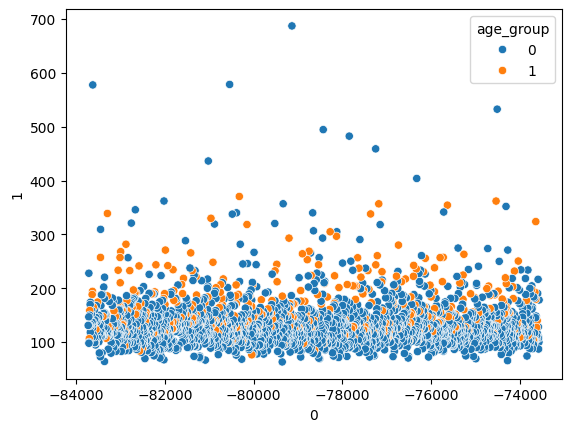

In [9]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(data.drop("age_group", axis=1))
data_for_draw = np.matmul(data.drop("age_group", axis=1), pca.components_.T)
sns.scatterplot(data=data_for_draw, x=data_for_draw[0], y=data_for_draw[1], hue=data["age_group"])

In [10]:
data_for_draw

,0,1
0,-73563.998649,178.104365
1,-73567.998318,99.690501
2,-73575.997014,86.957320
3,-73576.995016,109.218527
4,-73579.994017,107.005518
...,...,...
2273,-83710.993985,97.670376
2274,-83712.005565,227.744029
2275,-83712.998624,146.661413
2276,-83717.997440,131.346950


In [11]:
# train_X, test_X, train_y, test_y = train_test_split(data['RIDAGEYR'], data["age_group"], test_size=0.2, stratify=data["age_group"])
# train_X = np.expand_dims(train_X.to_numpy(), axis=-1)
# test_X = np.ex"pand_dims(test_X.to_numpy(), axis=-1)
train_X, test_X, train_y, test_y = train_test_split(data.drop(["age_group", "RIDAGEYR"], axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
mms = MinMaxScaler()
mms.fit(pd.concat((train_X,test_X)).sort_index())
train_X = pd.DataFrame(mms.transform(train_X))
test_X = pd.DataFrame(mms.transform(test_X))
train_X

,0,1,2,3,4,5,6,7
0,0.308472,1.0,0.166667,0.104317,0.105263,0.5,0.118794,0.142927
1,0.222178,1.0,0.166667,0.086331,0.078947,0.5,0.042553,0.030348
2,0.267736,0.0,0.166667,0.163669,0.084795,0.5,0.092199,0.076456
3,0.001181,0.0,0.166667,0.156475,0.076023,0.5,0.049645,0.058737
4,0.420840,0.0,0.166667,0.250000,0.119883,0.5,0.164894,0.075967
...,...,...,...,...,...,...,...,...
1817,0.031487,0.0,0.166667,0.291367,0.128655,0.5,0.099291,0.092511
1818,0.036800,1.0,0.166667,0.221223,0.163743,0.5,0.111702,0.166422
1819,0.061694,1.0,0.000000,0.230216,0.081871,0.5,0.088652,0.043857
1820,0.647053,1.0,0.166667,0.300360,0.093567,0.5,0.166667,0.083798


In [12]:
test_X

,0,1,2,3,4,5,6,7
0,0.429302,1.0,0.166667,0.152878,0.096491,0.5,0.157801,0.065198
1,0.442881,1.0,0.166667,0.122302,0.087719,0.5,0.129433,0.097993
2,0.436682,1.0,0.166667,0.080935,0.090643,0.5,0.046099,0.049046
3,0.074289,1.0,0.166667,0.093525,0.105263,0.5,0.159574,0.020950
4,0.639280,1.0,0.166667,0.303957,0.087719,0.5,0.090426,0.041018
...,...,...,...,...,...,...,...,...
451,0.219128,1.0,0.000000,0.064748,0.108187,0.5,0.104610,0.080470
452,0.811965,1.0,0.166667,0.230216,0.087719,0.5,0.106383,0.083113
453,0.225918,0.0,0.166667,0.471223,0.128655,0.5,0.159574,0.292903
454,0.108433,0.0,0.166667,0.228417,0.105263,0.5,0.173759,0.300636


In [13]:
features = {'n_estimators' : list(range(1, 20, 3)),
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1, 13, 4)),
    'min_samples_split': list(range(2, 20, 4)),
    'min_samples_leaf': list(range(2, 20, 4)),}
gscv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=features, verbose=2)

In [14]:
# gscv.fit(train_X, train_y)


RandomForestClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=18, n_estimators=16)

In [70]:
# train_X, test_X, train_y, test_y = train_test_split(data['RIDAGEYR'], data["age_group"], test_size=0.2, stratify=data["age_group"])
# train_X = np.expand_dims(train_X.to_numpy(), axis=-1)
# test_X = np.ex"pand_dims(test_X.to_numpy(), axis=-1)
train_X, test_X, train_y, test_y = train_test_split(data.drop(["age_group"], axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
mms = MinMaxScaler()
mms.fit(pd.concat((train_X,test_X)).sort_index())
train_X = pd.DataFrame(mms.transform(train_X))
test_X = pd.DataFrame(mms.transform(test_X))
train_X

,0,1,2,3,4,5,6,7,8
0,0.147791,0.470588,1.0,0.166667,0.223022,0.081871,0.5,0.152482,0.051395
1,0.618223,0.455882,1.0,0.166667,0.282374,0.096491,0.5,0.182624,0.116202
2,0.830759,0.632353,1.0,0.166667,0.080935,0.081871,0.5,0.042553,0.045619
3,0.266457,0.441176,1.0,0.166667,0.390288,0.146199,0.5,0.290780,0.185805
4,0.538817,0.676471,1.0,0.000000,0.392086,0.093567,0.5,0.115248,0.027802
...,...,...,...,...,...,...,...,...,...
1817,0.872380,0.176471,1.0,0.166667,0.298561,0.119883,0.5,0.214539,0.247871
1818,0.873463,1.000000,1.0,0.166667,0.235612,0.169591,0.5,0.113475,0.021243
1819,0.272459,1.000000,1.0,0.166667,0.142086,0.114035,0.5,0.303191,0.060597
1820,0.324707,1.000000,1.0,0.166667,0.215827,0.084795,0.5,0.193262,0.169848


In [71]:
rfc = RandomForestClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=18, n_estimators=16)
rfc.fit(train_X, train_y)
y_pred = rfc.predict(test_X)

In [72]:
precision_score(test_y, y_pred)

1.0

In [73]:
recall_score(test_y, y_pred)

1.0

In [74]:
f1_score(test_y, y_pred)

1.0

In [75]:
rfc_pickle = pickle.dumps(rfc)
dump(rfc_pickle, '/home/mike/python_files/ML_services/ml_models/random_forest_classifier_w_ridageyr.joblib') 

['/home/mike/python_files/ML_services/ml_models/random_forest_classifier_w_ridageyr.joblib']

In [290]:
train_X, test_X, train_y, test_y = train_test_split(data.drop(["age_group", "RIDAGEYR"], axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
mms = MinMaxScaler()
mms.fit(pd.concat((train_X,test_X)))
train_X = pd.DataFrame(mms.transform(train_X))
test_X = pd.DataFrame(mms.transform(test_X))

In [291]:
abc = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)
abc.fit(train_X, train_y)
y_pred = abc.predict(test_X)

In [292]:
precision_score(test_y, y_pred)

0.3181818181818182

In [293]:
recall_score(test_y, y_pred)

0.2876712328767123

In [294]:
f1_score(test_y, y_pred)

0.302158273381295

In [295]:
abc_pickle = pickle.dumps(abc)
dump(abc_pickle, '/home/mike/python_files/ML_services/ml_models/ada_boost_classifier_wo_ridageyr.joblib') 

['/home/mike/python_files/ML_services/ml_models/ada_boost_classifier_wo_ridageyr.joblib']

In [146]:
train_X, test_X, train_y, test_y = train_test_split(data.drop(["age_group", "RIDAGEYR"], axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
mms = MinMaxScaler()
mms.fit(pd.concat((train_X,test_X)))
train_X = pd.DataFrame(mms.transform(train_X))
test_X = pd.DataFrame(mms.transform(test_X))

In [147]:
bc = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10)
bc.fit(train_X, train_y)
y_pred = bc.predict(test_X)

In [148]:
precision_score(test_y, y_pred)

0.43333333333333335

In [149]:
recall_score(test_y, y_pred)

0.1780821917808219

In [150]:
f1_score(test_y, y_pred)

0.25242718446601936

In [151]:
bc = pickle.dumps(bc)
dump(bc, '/home/mike/python_files/ML_services/ml_models/bagging_classifier_wo_ridageyr.joblib') 

['/home/mike/python_files/ML_services/ml_models/bagging_classifier_wo_ridageyr.joblib']

In [417]:
train_X, test_X, train_y, test_y = train_test_split(data.drop(["age_group"], axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
mms = MinMaxScaler()
mms.fit(pd.concat((train_X,test_X)))
train_X = pd.DataFrame(mms.transform(train_X))
test_X = pd.DataFrame(mms.transform(test_X))

In [418]:
gbc = GradientBoostingClassifier()
gbc.fit(train_X, train_y)
y_pred = gbc.predict(test_X)

In [419]:
precision_score(test_y, y_pred)

1.0

In [420]:
recall_score(test_y, y_pred)

1.0

In [421]:
f1_score(test_y, y_pred)

1.0

In [422]:
gbc = pickle.dumps(gbc)
dump(gbc, '/home/mike/python_files/ML_services/ml_models/gradient_boosting_w_ridageyr.joblib') 

['/home/mike/python_files/ML_services/ml_models/gradient_boosting_w_ridageyr.joblib']

In [5055]:
train_X, test_X, train_y, test_y = train_test_split(data.drop(["age_group", "RIDAGEYR"], axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
# train_X, test_X, train_y, test_y = train_test_split(data.drop("age_group", axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
mms = MinMaxScaler()
mms.fit(pd.concat((train_X,test_X)))
train_X = pd.DataFrame(mms.transform(train_X))
test_X = pd.DataFrame(mms.transform(test_X))
train_X

,0,1,2,3,4,5,6,7
0,0.155958,1.0,0.166667,0.185252,0.081871,0.5,0.134752,0.040235
1,0.970875,1.0,0.166667,0.165468,0.137427,1.0,0.074468,0.093098
2,0.035619,0.0,0.166667,0.294964,0.119883,0.5,0.136525,0.109153
3,0.742497,1.0,0.166667,0.165468,0.090643,0.5,0.067376,0.088889
4,0.542064,1.0,0.166667,0.154676,0.096491,0.5,0.044326,0.109349
...,...,...,...,...,...,...,...,...
1817,0.584867,0.0,0.166667,0.084532,0.119883,0.5,0.125887,0.156926
1818,0.600216,0.0,0.166667,0.206835,0.102339,0.5,0.065603,0.158688
1819,0.922562,1.0,0.000000,0.149281,0.090643,0.5,0.140071,0.061968
1820,0.305717,1.0,0.166667,0.194245,0.043860,0.5,0.083333,0.061282


In [5056]:
rfc = RandomForestClassifier(n_estimators=7)
rfc.fit(train_X, train_y)
y_pred = rfc.predict(test_X)

In [5057]:
precision_score(test_y, y_pred)

0.5

In [5058]:
recall_score(test_y, y_pred)

0.1780821917808219

In [5059]:
f1_score(test_y, y_pred)

0.2626262626262626

In [5060]:
rfc.feature_importances_

array([0.17888099, 0.01479881, 0.01484395, 0.17746002, 0.17273453,
       0.01234251, 0.22754625, 0.20139294])

In [351]:
# train_X, test_X, train_y, test_y = train_test_split(data.drop(["age_group", "RIDAGEYR"], axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
train_X, test_X, train_y, test_y = train_test_split(data.drop("age_group", axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
mms = MinMaxScaler()
mms.fit(pd.concat((train_X,test_X)))
train_X = pd.DataFrame(mms.transform(train_X))
test_X = pd.DataFrame(mms.transform(test_X))

In [352]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
y_pred = lr.predict(test_X)

In [353]:
f1_score(test_y, y_pred)

0.9420289855072463

In [354]:
lr = pickle.dumps(lr)
dump(lr, '/home/mike/python_files/ML_services/ml_models/logistic_w_ridageyr.joblib') 

['/home/mike/python_files/ML_services/ml_models/logistic_w_ridageyr.joblib']

In [333]:
train_X, test_X, train_y, test_y = train_test_split(data.drop(["age_group", "RIDAGEYR"], axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
# train_X, test_X, train_y, test_y = train_test_split(data.drop("age_group", axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
mms = MinMaxScaler()
mms.fit(pd.concat((train_X,test_X)))
train_X = pd.DataFrame(mms.transform(train_X))
test_X = pd.DataFrame(mms.transform(test_X))

In [334]:
svc = SVC()
svc.fit(train_X, train_y)
y_pred = svc.predict(test_X)

In [335]:
f1_score(test_y, y_pred)

0.0

In [343]:
# train_X, test_X, train_y, test_y = train_test_split(data.drop(["age_group", "RIDAGEYR"], axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
train_X, test_X, train_y, test_y = train_test_split(data.drop("age_group", axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
mms = MinMaxScaler()
mms.fit(pd.concat((train_X,test_X)))
train_X = pd.DataFrame(mms.transform(train_X))
test_X = pd.DataFrame(mms.transform(test_X))

In [344]:
dtc = DecisionTreeClassifier()
dtc.fit(train_X, train_y)
y_pred = dtc.predict(test_X)

In [345]:
f1_score(test_y, y_pred)

1.0

In [346]:
dtc = pickle.dumps(dtc)
dump(dtc, '/home/mike/python_files/ML_services/ml_models/decision_tree_w_ridageyr.joblib') 

['/home/mike/python_files/ML_services/ml_models/decision_tree_w_ridageyr.joblib']

In [5072]:
# train_X, test_X, train_y, test_y = train_test_split(data.drop(["age_group", "RIDAGEYR"], axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
train_X, test_X, train_y, test_y = train_test_split(data.drop("age_group", axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
mms = MinMaxScaler()
mms.fit(pd.concat((train_X,test_X)))
train_X = pd.DataFrame(mms.transform(train_X))
test_X = pd.DataFrame(mms.transform(test_X))

In [5073]:
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)
y_pred = knn.predict(test_X)

In [5074]:
f1_score(test_y, y_pred)

0.9324324324324323